# House Prices: Advanced Regression Techniques

## Introduction

In this notebook, a data analysis pipeline is to be applied to the Ames Housing Dataset to predict house prices. The pipeline is going to begin with some exploratory data analysis. After the exploratory data analysis, the prediction stage will come into the scene. The whole analysis will be carried out in Python.

## Exploratory Data Analysis

The data set is composed of the train set and the test set. The train set is to be read from the disc. However, the file reading option 'keep_default_na' will be set to false to avoid any automatic null assignment.

In [187]:
import pandas as pd

train_data=pd.read_csv('train.csv', keep_default_na=False)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [188]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2008,WD,Normal,147500


Let the information about the data set be obtained.

In [189]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

As can be seen from the above listing, there are 81 columns. The non-null entries in the columns must be controlled if they are from the allowed data value range of each column. The data description file contains the range of the values the columns are allowed to contain. In the following code chunk, they are to be read from description file.

In [190]:
categorical_dict_temp={}
with open('data_description.txt') as f:
    for line in f:
        if ':' in line:
            feature_name=line.split(':')[0]
            categorical_dict_temp[feature_name]=[]
        else:
            value=line.split('\t')[0]
            if (value != '\n') & (value != ''):
                categorical_dict_temp[feature_name].append(value.strip())

categorical_dict={}
for key, value in categorical_dict_temp.items():
    if value:
        categorical_dict[key]=value

print(categorical_dict)

{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], 

The allowed values for the categorical features are as shown in the above. Now, they are to be used as reference for checking the data frame values in a manner shown as follows: 

In [191]:
import numpy as np
for key, value in categorical_dict.items():
    data_values=train_data[key].unique()
    data_values=data_values.astype(str)
    the_diff=np.setdiff1d(data_values, np.array(value))
    if len(the_diff) > 0:
        print(key)
        print(data_values)
        print(value)
        print(the_diff)

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']
['C (all)']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
['NAmes']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
['2fmCon' 'Duplex' 'Twnhs']
Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 

From the above listing, it is seen that there are some entries which do not take the allowed values. As shown in the below lines, these values are replaced with the allowed values in the data frame. The operation on 'Twnhs' will be carried out after examining the test data.

In [192]:
train_data.replace(['C (all)', 'NAmes', '2fmCon', 'Duplex', 'Brk Cmn', 'CmentBd', 'Wd Shng'], 
                   ['C', 'Names', '2FmCon', 'Duplx', 'BrkComm', 'CemntBd', 'WdShing'], inplace=True)

A similar operation is to be applied to the test data.

In [193]:
test_data=pd.read_csv('test.csv', keep_default_na=False)
for key, value in categorical_dict.items():
    data_values=test_data[key].unique()
    data_values=data_values.astype(str)
    the_diff=np.setdiff1d(data_values, np.array(value))
    if len(the_diff) > 0:
        print(key)
        print(data_values)
        print(value)
        print(the_diff)

MSZoning
['RH' 'RL' 'RM' 'FV' 'C (all)' 'NA']
['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']
['C (all)' 'NA']
Utilities
['AllPub' 'NA']
['AllPub', 'NoSewr', 'NoSeWa', 'ELO']
['NA']
Neighborhood
['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
['NAmes']
BldgType
['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
['2fmCon' 'Duplex' 'Twnhs']
Exterior1st
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'NA' 'CBlock']
['AsbSh

In [194]:
test_data.replace(['C (all)', 'NAmes', '2fmCon', 'Duplex', 'Brk Cmn', 'CmentBd', 'Wd Shng'], 
                   ['C', 'Names', '2FmCon', 'Duplx', 'BrkComm', 'CemntBd', 'WdShing'], inplace=True)

Since 'Twnhs' exists in the test data as well as the train data, it is not replaced with any value.
Now, the column data types will be listed.

In [195]:
train_data.columns.to_series().groupby(train_data.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('O'): Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFi

Hence, there are only integer data type and the object data type. Some of the integer data type features are categorical features. The numeric features are infact all float data types although pandas has read them as integers. They are to be converted to float data type from the integer data type. Then, the numeric features are checked if they have any null values.

In [196]:
numeric_features= ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

print(train_data[numeric_features].isnull().sum())

for the_feature in numeric_features:
    train_data[the_feature]=train_data[the_feature].astype('float')

LotArea          0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64


As can be observed in the above, the numeric values do not have any null values.
Now, the histograms of the numeric features are to be plotted to see their distribution and variance.

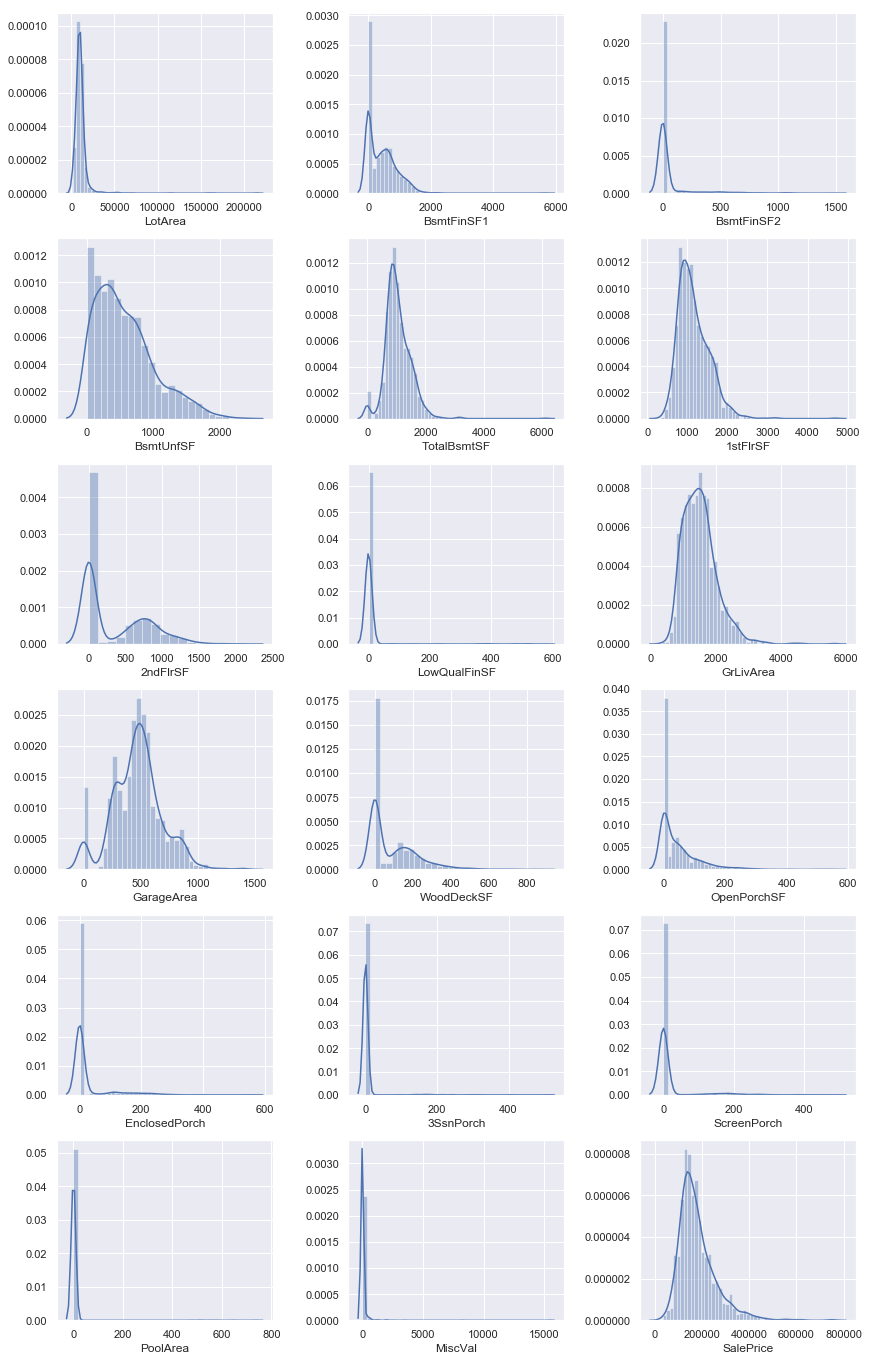

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns

sns.set()
num_of_figures=len(numeric_features)

for i in range(num_of_figures):
    plt.subplot(6,3,i+1)
    sns.distplot(train_data[numeric_features[i]])

plt.subplots_adjust(top=4.82, bottom=0.28, left=0.10, right=1.95, hspace=0.25,
                    wspace=0.35)

plt.show()

From the above histogram plots, it is observed that all of the numeric features have skew. Let the variances of the numeric features be tabulated:

In [198]:
train_data[numeric_features].var()

LotArea          9.962565e+07
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
SalePrice        6.311111e+09
dtype: float64

The variances of the numeric features display high variance. The variances of the features 'LotArea' and 'SalePrice' are very high.
The boxplots of the numeric features are constructed to see that some numeric features have considerable number of outliers.

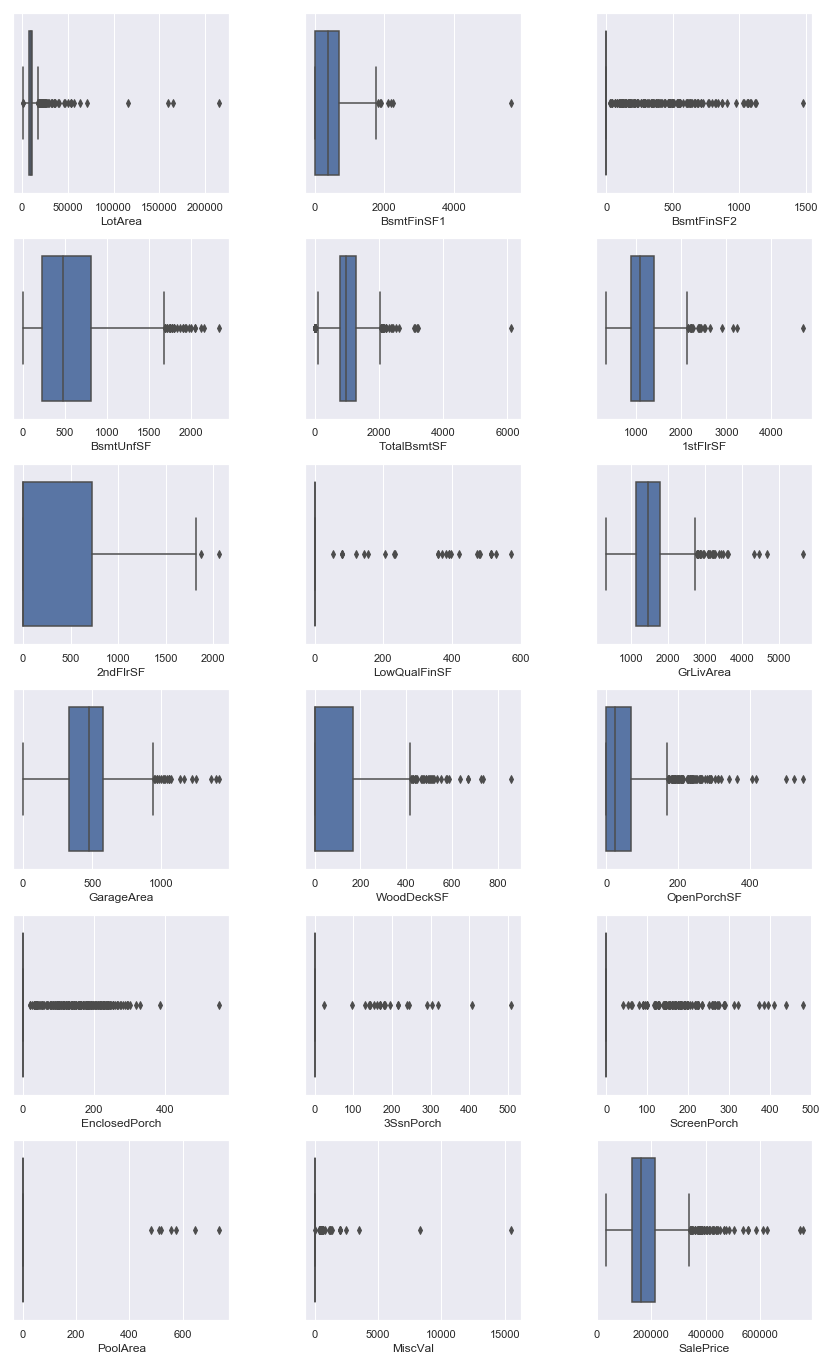

In [199]:
for i in range(num_of_figures):
    plt.subplot(6,3,i+1)
    sns.boxplot(x=train_data[numeric_features[i]])

plt.subplots_adjust(top=4.82, bottom=0.28, left=0.10, right=1.95, hspace=0.25,
                    wspace=0.35)

plt.show()

The above boxplots suggest the determination of the number and percentage of zeros in each numeric feature.

In [200]:
zero_info_dict={'num_of_zeros': [], 'percentage_of_zeros': []}
num_of_entries=train_data.shape[0]
for the_feature in numeric_features:
    num_of_zeros=np.sum(train_data[the_feature]==0.0)
    percentage_of_zeros=100.0*num_of_zeros/num_of_entries
    zero_info_dict['num_of_zeros'].append(num_of_zeros)
    zero_info_dict['percentage_of_zeros'].append(percentage_of_zeros)
zero_info_df=pd.DataFrame(zero_info_dict, index=numeric_features)
print(zero_info_df)

               num_of_zeros  percentage_of_zeros
LotArea                   0             0.000000
BsmtFinSF1              467            31.986301
BsmtFinSF2             1293            88.561644
BsmtUnfSF               118             8.082192
TotalBsmtSF              37             2.534247
1stFlrSF                  0             0.000000
2ndFlrSF                829            56.780822
LowQualFinSF           1434            98.219178
GrLivArea                 0             0.000000
GarageArea               81             5.547945
WoodDeckSF              761            52.123288
OpenPorchSF             656            44.931507
EnclosedPorch          1252            85.753425
3SsnPorch              1436            98.356164
ScreenPorch            1344            92.054795
PoolArea               1453            99.520548
MiscVal                1408            96.438356
SalePrice                 0             0.000000


Some of the numeric features are dominated by zeros. These features are 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'. These features can be transformed to binary categorical features indicating the existance of the related feature.
High variance in some numeric features, skewness in the distributions and existance of outliers suggest to apply a special type of scaling to the numeric features. But before applying the scaling, let the heatmap of the correlation between the numeric features be plotted.

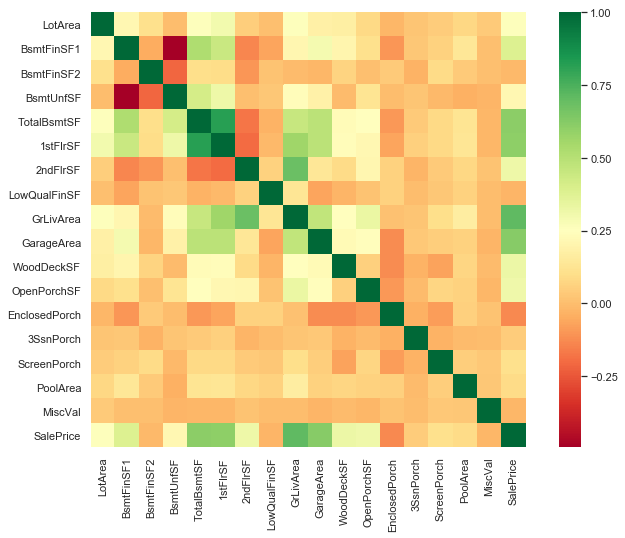

In [201]:
F = plt.gcf()
DefaultSize = F.get_size_inches()
F.set_size_inches((DefaultSize[0]*2, DefaultSize[1]*2))
sns.heatmap(train_data[numeric_features].corr(), square=True, cmap='RdYlGn')
plt.show()


The above heatmap gives the very first picture of the correlated features. "TotalBsmtSF-1stFlrSF", "BsmtFinSF1-BsmtUnfSF", "GrLivArea-2ndFlrSF", "GrLivArea-SalePrice", "GarageArea-SalePrice", "1stFlrSF-SalePrice" and "TotalBsmtSF-SalePrice" seem to be linearly correlated variables. Let us check if they are really so by making pairplot.

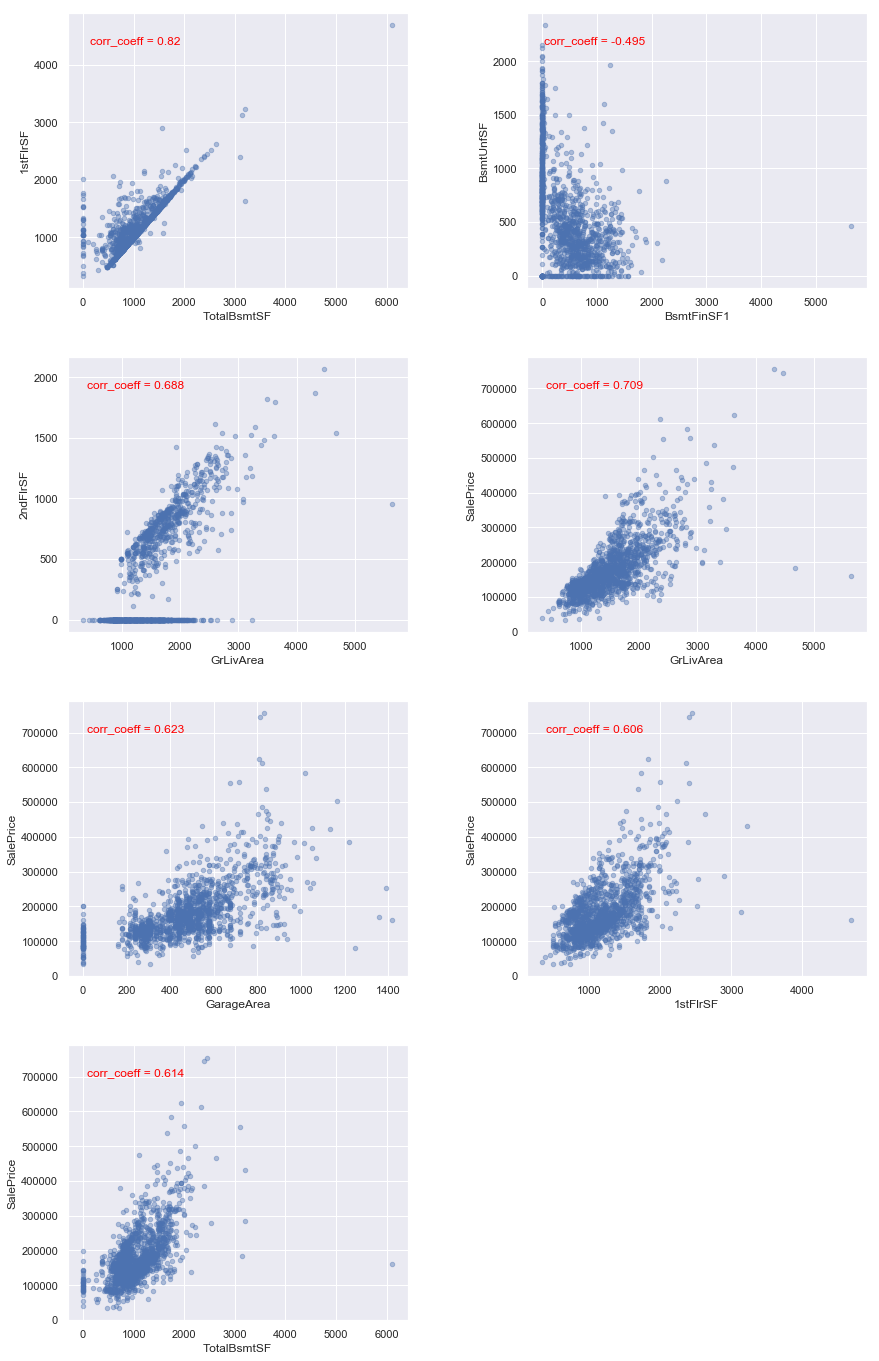

In [202]:
x_var_list = ["TotalBsmtSF", "BsmtFinSF1", "GrLivArea", "GrLivArea", "GarageArea", "1stFlrSF", "TotalBsmtSF"]
y_var_list = ["1stFlrSF", "BsmtUnfSF", "2ndFlrSF", "SalePrice", "SalePrice", "SalePrice", "SalePrice"]
# fig = plt.figure()
for i in range(len(x_var_list)):
    ax = plt.subplot(4,2,i+1)
    x_var = train_data[x_var_list[i]].values
    y_var = train_data[y_var_list[i]].values
    corr_coeff = np.corrcoef(x_var, y_var)[0, 1]
    ax.scatter(x_var, y_var, alpha=0.4, s=20)
    the_text = "corr_coeff = " + repr(np.round(corr_coeff, 3))
    ax.text(0.2, 0.9, the_text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color="red")
    plt.xlabel(x_var_list[i])
    plt.ylabel(y_var_list[i])

plt.subplots_adjust(top=4.82, bottom=0.28, left=0.10, right=1.95, hspace=0.25,
                    wspace=0.35)

plt.show()

The explanations for the plotted features are as follows:

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

BsmtFinSF1: Type 1 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet

TotalBsmtSF and 1stFlrSF have a high linear correlation coefficient. The first subplot shows the scatter plot for these two features. They seem to be linearly correlated. When the explanations for these features are taken into account, it seems natural that a house with a large basement area tends to have a large first floor. 2ndFlrSF and GrLivArea seem to be linearly correlated as well. A house with a large second floor tends to have a large above grade (ground) living area. TotalBsmtSF, 1stFlrSF, GarageArea do not affect the sale price that much. GrLivArea has a comparatively higher effect on the sale price.